In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
import seaborn as sns
from scipy import stats
import warnings

In [145]:
df=pd.read_csv("/content/building_energy_data.csv")

# EDA(Exploratory Data Analysis)

In [146]:
df.shape

(768, 10)

In [147]:
df.head()

,Compactness_Index,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Dist,Heating_Load,Cooling_Load
0,0.74,578.0,289.0,289.0,3.5,5,0.00,2,22.45,28.54
1,0.66,602.0,301.0,301.0,3.5,4,0.25,2,24.48,33.21
2,0.71,587.0,293.5,293.5,3.5,5,0.25,5,27.41,32.38
3,0.76,572.0,286.0,286.0,7.0,3,0.40,3,27.86,32.95
4,0.76,572.0,286.0,286.0,7.0,2,0.40,0,30.63,31.75


In [148]:
df.isnull().sum()

,0
Compactness_Index,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Dist,0
Heating_Load,0
Cooling_Load,0


In [149]:
df.describe()

,Compactness_Index,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Dist,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.767904,569.628906,284.814453,284.814453,5.313802,3.459635,0.19388,2.566406,24.733815,29.624375
std,0.105620,31.685985,15.842992,15.842992,1.749976,1.141118,0.14945,1.709935,4.287277,5.035328
min,0.620000,506.000000,253.000000,253.000000,3.500000,2.000000,0.00000,0.000000,13.500000,14.320000
25%,0.690000,542.000000,271.000000,271.000000,3.500000,2.000000,0.10000,1.000000,21.750000,26.312500
50%,0.760000,572.000000,286.000000,286.000000,7.000000,3.000000,0.25000,3.000000,24.730000,29.555000
75%,0.860000,593.000000,296.500000,296.500000,7.000000,5.000000,0.40000,4.000000,27.712500,33.030000
max,0.980000,614.000000,307.000000,307.000000,7.000000,5.000000,0.40000,5.000000,37.350000,42.020000


Plotting graphs


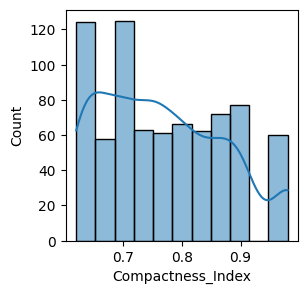

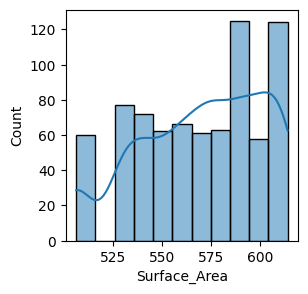

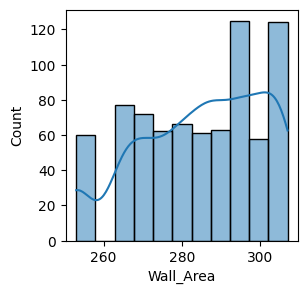

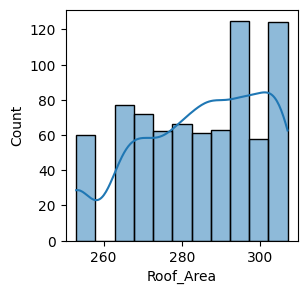

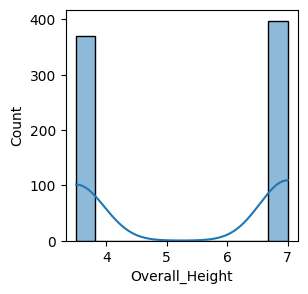

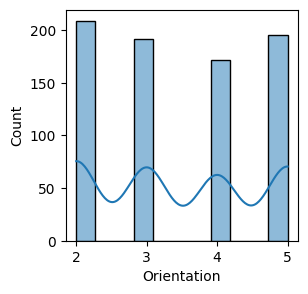

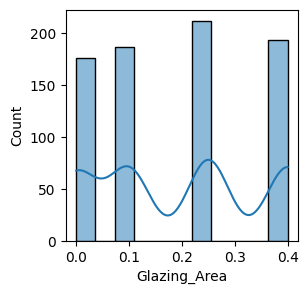

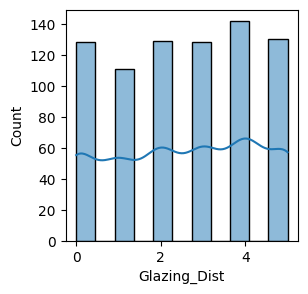

In [150]:


columns=df.columns.to_list()
columns.pop(-1)
columns.pop(-1)
for i in range(len(columns)):
  plt.subplots(figsize=(3,3))
  sns.histplot(data=df,x=columns[i],kde=True);

In [151]:
#roof,wall,surface and compactness appear to be numerical data while others
#lean towards categorical data

In [152]:

from scipy.stats import skew

print("skewness of the data:")
skewnes=[]
for i in range(len(columns)):
  column=columns[i]
  skewnes.append((column,skew(df[column])))
skewnes.sort(key= lambda x:abs(x[1]), reverse=True)
print(skewnes)

skewness of the data:
[('Surface_Area', np.float64(-0.40796709295944605)), ('Wall_Area', np.float64(-0.40796709295944605)), ('Roof_Area', np.float64(-0.40796709295944605)), ('Compactness_Index', np.float64(0.407967092959445)), ('Glazing_Area', np.float64(0.11341936022614232)), ('Glazing_Dist', np.float64(-0.08121796915621624)), ('Overall_Height', np.float64(-0.0729651758149444)), ('Orientation', np.float64(0.06255137270803741))]


If we have skewnes>0.5, we would have to reduce outlier effct transforming columns having high skewnes value with sqrt and log. but we do not have rn.

In [153]:
#transforimg surface area
df['Surface_Area']=np.log(df['Surface_Area'])
skew(df['Surface_Area'])

np.float64(-0.4950165022798008)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compactness_Index  768 non-null    float64
 1   Surface_Area       768 non-null    float64
 2   Wall_Area          768 non-null    float64
 3   Roof_Area          768 non-null    float64
 4   Overall_Height     768 non-null    float64
 5   Orientation        768 non-null    int64  
 6   Glazing_Area       768 non-null    float64
 7   Glazing_Dist       768 non-null    int64  
 8   Heating_Load       768 non-null    float64
 9   Cooling_Load       768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<Axes: >

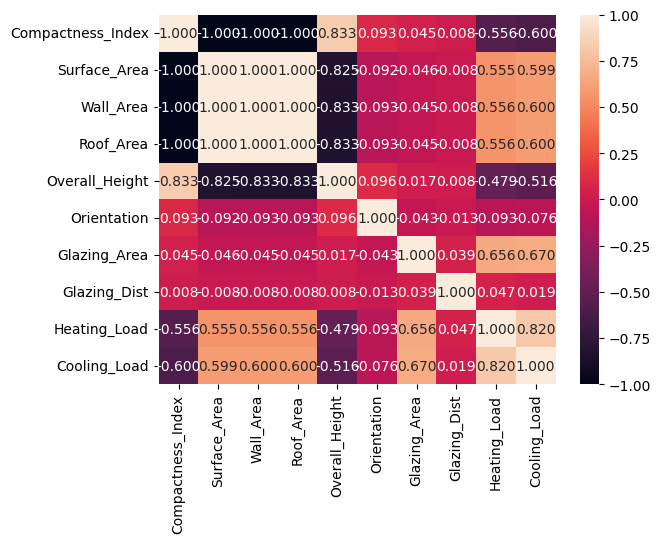

In [155]:
corrolated=df.corr()
sns.heatmap(corrolated,annot=True,fmt=".3f")

In [156]:
#there appears to be correlation between compactness,surface_area,wall_area and roof_area.
#that's multicollinearity. we want one of them
df = df.drop(['Surface_Area', 'Wall_Area', 'Roof_Area'], axis=1)

#also, overall height and compactness are correlated with each other and outcomes.


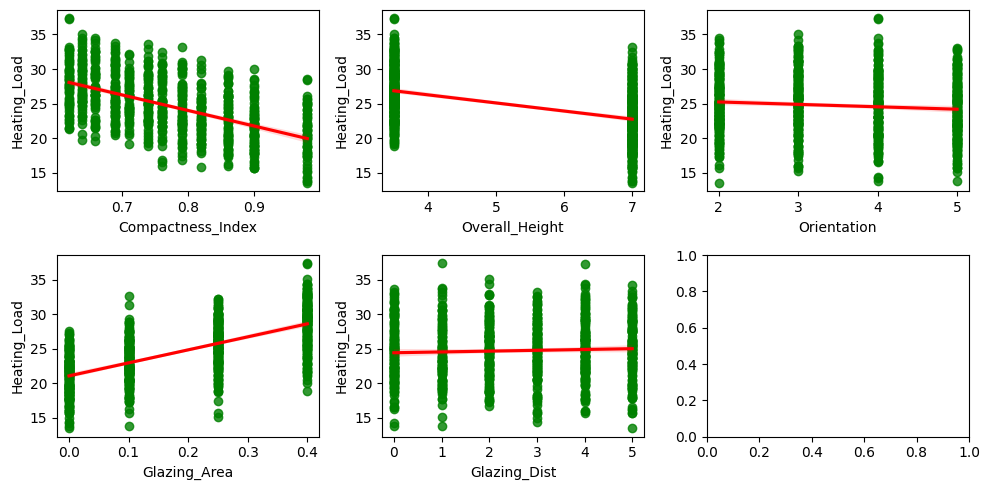

In [157]:

n_rows=2
n_cols=3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.regplot(x=df[column], y=df['Heating_Load'], ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

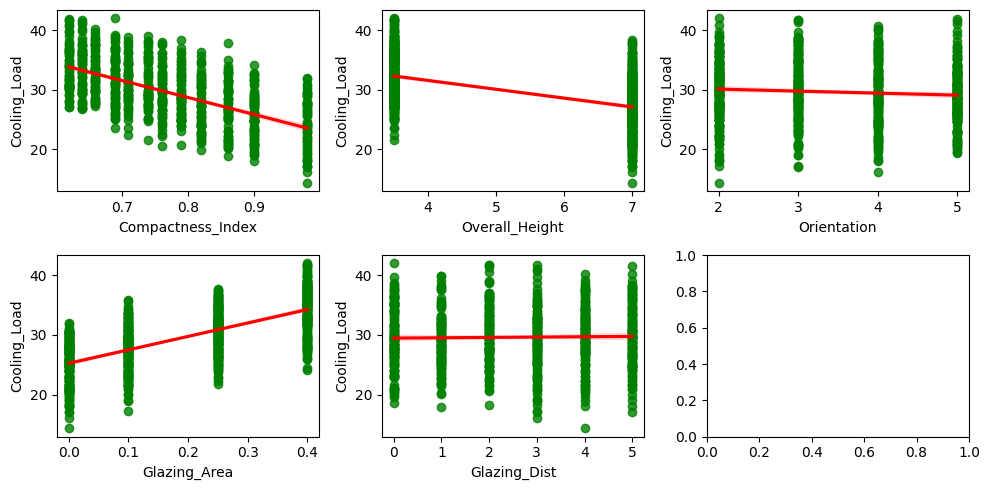

In [158]:

n_rows=2
n_cols=3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.regplot(x=df[column], y=df['Cooling_Load'], ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

In [159]:
#they are not seprable linearly.



In [160]:
# Orientation and Glazing Area dist. is weakly correlated to the outcomes and other features.
df.drop(["Glazing_Dist","Orientation"],inplace=True,axis=1)


# Data Preprocessing

In [161]:
y = df[['Heating_Load', 'Cooling_Load']]

df=df.drop(["Heating_Load","Cooling_Load"],axis=1)

Splitting the dataset

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y,
    test_size=0.2,
    random_state=101
)

Scaling

In [163]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

### Linear regression

In [164]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [165]:
lr.fit(scaled_train,y_train)

LinearRegression()

In [166]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [167]:
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(lr.predict(scaled_train),y_train))
print("mean_absolute_error: ",mean_absolute_error(lr.predict(scaled_train),y_train))
print("mean_squared_error: ", mean_squared_error(lr.predict(scaled_train),y_train))

Evaluation metrics for Training set
r2_score:  0.765995059406685
mean_absolute_error:  1.6063593148888895
mean_squared_error:  4.015397578885674


In [168]:
y_pred=lr.predict(scaled_test)

print("Predictions:")
for (h_true, c_true), (h_pred, c_pred) in zip(y_test.values, y_pred):
    print(
        f"Heat  → real: {h_true:.2f}, predicted: {h_pred:.2f} | "
        f"Cool  → real: {c_true:.2f}, predicted: {c_pred:.2f}"
    )



Predictions:
Heat  → real: 27.36, predicted: 27.76 | Cool  → real: 33.17, predicted: 33.26
Heat  → real: 25.28, predicted: 26.52 | Cool  → real: 30.72, predicted: 31.91
Heat  → real: 25.21, predicted: 23.65 | Cool  → real: 31.78, predicted: 27.94
Heat  → real: 29.84, predicted: 29.43 | Cool  → real: 36.28, predicted: 35.39
Heat  → real: 32.87, predicted: 32.33 | Cool  → real: 36.89, predicted: 38.86
Heat  → real: 20.51, predicted: 24.86 | Cool  → real: 28.48, predicted: 29.79
Heat  → real: 17.53, predicted: 18.76 | Cool  → real: 20.29, predicted: 22.31
Heat  → real: 23.07, predicted: 23.60 | Cool  → real: 31.18, predicted: 28.11
Heat  → real: 22.55, predicted: 24.55 | Cool  → real: 30.32, predicted: 29.32
Heat  → real: 14.41, predicted: 15.91 | Cool  → real: 16.14, predicted: 18.67
Heat  → real: 26.68, predicted: 27.76 | Cool  → real: 35.01, predicted: 33.26
Heat  → real: 33.76, predicted: 31.86 | Cool  → real: 37.50, predicted: 38.26
Heat  → real: 19.32, predicted: 21.73 | Cool  → rea

In [169]:

print("Evaluation metrics for Test set")
print("r2_score: ", r2_score(lr.predict(scaled_test),y_test))
print("mean_absolute_error: ",mean_absolute_error(lr.predict(scaled_test),y_test))
print("mean_squared_error: ", mean_squared_error(lr.predict(scaled_test),y_test))

Evaluation metrics for Test set
r2_score:  0.7467365523442547
mean_absolute_error:  1.6386521624469976
mean_squared_error:  4.068041177751831


### Decision Trees

In [172]:
#lets find best parameters


In [175]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Define Decision Tree model
dt = DecisionTreeRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[101]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(scaled_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)



Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 101}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

In [176]:
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(grid_search.predict(scaled_train),y_train))
print("mean_absolute_error: ",mean_absolute_error(grid_search.predict(scaled_train),y_train))
print("mean_squared_error: ", mean_squared_error(grid_search.predict(scaled_train),y_train))

Evaluation metrics for Training set
r2_score:  0.7828932592491443
mean_absolute_error:  1.555657542313183
mean_squared_error:  3.7896702436599488


In [177]:
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(grid_search.predict(scaled_test),y_test))
print("mean_absolute_error: ",mean_absolute_error(grid_search.predict(scaled_test),y_test))
print("mean_squared_error: ", mean_squared_error(grid_search.predict(scaled_test),y_test))

Evaluation metrics for Training set
r2_score:  0.7828932592491443
mean_absolute_error:  1.555657542313183
mean_squared_error:  3.7896702436599488


# Public API

In [179]:
import pickle

In [183]:
filename="energy_model.sav"
with open(filename,"wb") as file:
  pickle.dump(grid_search, file)

In [185]:
for column in X_train.columns:
  print(column)

Compactness_Index
Overall_Height
Glazing_Area
